In [93]:
#imports
import pandas as pd
import json
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
import ast
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
from matplotlib.ticker import FuncFormatter, MultipleLocator

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bokchoe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [94]:
df = pd.read_csv('all_locations.csv')
df.head(3)

position_section position_subsection  \
0           SPORTS             unknown   
1         MAGAZINE             unknown   
2           SUNDAY              Travel   

                                                hl1  \
0                       tough time breaking the ice   
1  top 5 places new englanders like to go in winter   
2                      home design with art in mind   

                                                 hl2              author  \
0  bc has only all-female staff in division 1 hockey             unknown   
1  our favorite destinations aren't all warm — pl...  By Marisa Dellatto   
2                                            unknown             unknown   

                                                lede  \
0  the boston college women's hockey team takes t...   
1  > $141.17 — average cost of a night in a mass....   
2  the restored sunken garden at hill-stead in fa...   

                                                body    pub_date  \
0  it's unacceptable that women's college hockey ...  2016-11-13   
1  > 25 degrees — average temperature across new ...  2016-11-13   
2  hill-stead, pope's 33,000-square-foot colonial...  2016-11-13   

                                      indexing_terms  year  ...  ID  \
0  {'subject': [{'score': '90', 'classCode': 'STX...  2016  ...   1   
1  {'subject': [{'score': '91', 'classCode': 'ST0...  2016  ...   2   
2  {'subject': [{'score': '90', 'classCode': 'N71...  2016  ...   3   

                                              name Total Total.1 White Black  \
0  Census Tract 919, Suffolk County, Massachusetts  4278    3551   219  2587   
1                                                0     0       0     0     0   
2  Census Tract 707, Suffolk County, Massachusetts  2527    2313  1413   506   

  AI/AN Asian NHPI  Other  
0    32    65    0    648  
1     0     0    0      0  
2    10   266    0    118  

[3 rows x 34 columns]

In [95]:
df.columns

Index(['position_section', 'position_subsection', 'hl1', 'hl2', 'author',
       'lede', 'body', 'pub_date', 'indexing_terms', 'year',
       'actual_body_word_count', 'body_cleaned', 'llama_pred', 'span_NER_pred',
       'NER_Filtered', 'TRACT_LIST', 'COUNTY_LIST', 'LONG_LAT', 'keywords',
       'keyword_sentiment', 'hl1_sentiment', 'body_sentiment', 'clean_tract',
       'neighborhood', 'ID', 'name', 'Total', 'Total.1', 'White', 'Black',
       'AI/AN', 'Asian', 'NHPI', 'Other'],
      dtype='object')

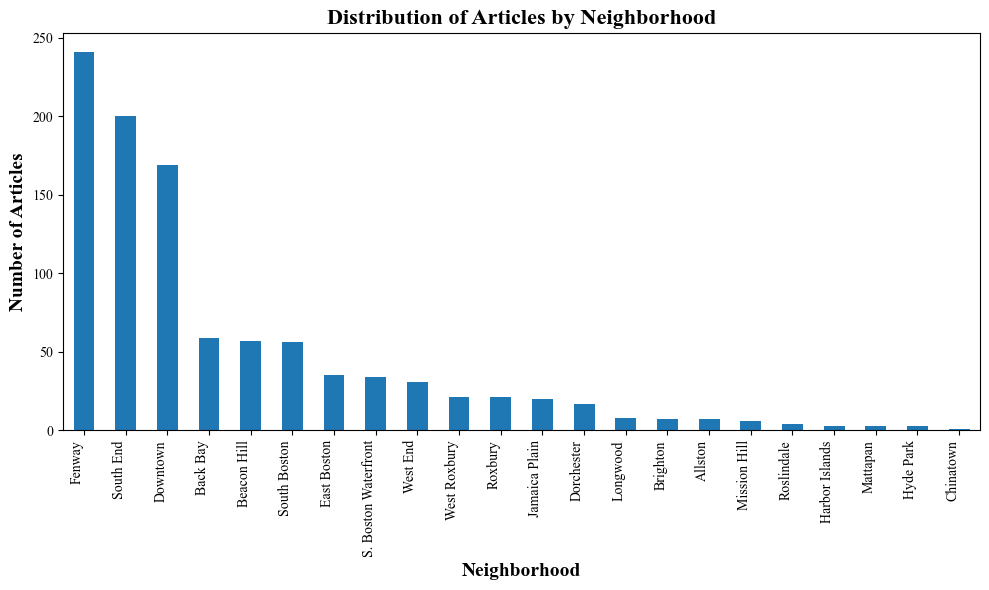

In [96]:
neighborhood_counts = df['neighborhood'].value_counts()
neighborhood_counts = neighborhood_counts.drop(['0'], errors='ignore')

# Plot the distribution using a bar chart
plt.figure(figsize=(10, 6))
neighborhood_counts.plot(kind='bar')
plt.title('Distribution of Articles by Neighborhood',fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.xlabel('Neighborhood',fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.ylabel('Number of Articles',fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.xticks(rotation=90, ha='right',fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.tight_layout()
plt.savefig('num_articles_by_neighborhood', transparent = True)
plt.show()

In [97]:
# Create a list of race columns
race_columns = ['White', 'Black', 'AI/AN', 'Asian', 'NHPI', 'Other']

# Find the race with the highest value for each row
df['race'] = df[race_columns].idxmax(axis=1)
df.loc[df[race_columns].sum(axis=1) == 0, 'race'] = 'unknown'

# Display the DataFrame to verify the changes
df.head(3)


position_section position_subsection  \
0           SPORTS             unknown   
1         MAGAZINE             unknown   
2           SUNDAY              Travel   

                                                hl1  \
0                       tough time breaking the ice   
1  top 5 places new englanders like to go in winter   
2                      home design with art in mind   

                                                 hl2              author  \
0  bc has only all-female staff in division 1 hockey             unknown   
1  our favorite destinations aren't all warm — pl...  By Marisa Dellatto   
2                                            unknown             unknown   

                                                lede  \
0  the boston college women's hockey team takes t...   
1  > $141.17 — average cost of a night in a mass....   
2  the restored sunken garden at hill-stead in fa...   

                                                body    pub_date  \
0  it's unacceptable that women's college hockey ...  2016-11-13   
1  > 25 degrees — average temperature across new ...  2016-11-13   
2  hill-stead, pope's 33,000-square-foot colonial...  2016-11-13   

                                      indexing_terms  year  ...  \
0  {'subject': [{'score': '90', 'classCode': 'STX...  2016  ...   
1  {'subject': [{'score': '91', 'classCode': 'ST0...  2016  ...   
2  {'subject': [{'score': '90', 'classCode': 'N71...  2016  ...   

                                              name Total Total.1 White Black  \
0  Census Tract 919, Suffolk County, Massachusetts  4278    3551   219  2587   
1                                                0     0       0     0     0   
2  Census Tract 707, Suffolk County, Massachusetts  2527    2313  1413   506   

  AI/AN Asian NHPI Other     race  
0    32    65    0   648    Black  
1     0     0    0     0  unknown  
2    10   266    0   118    White  

[3 rows x 35 columns]

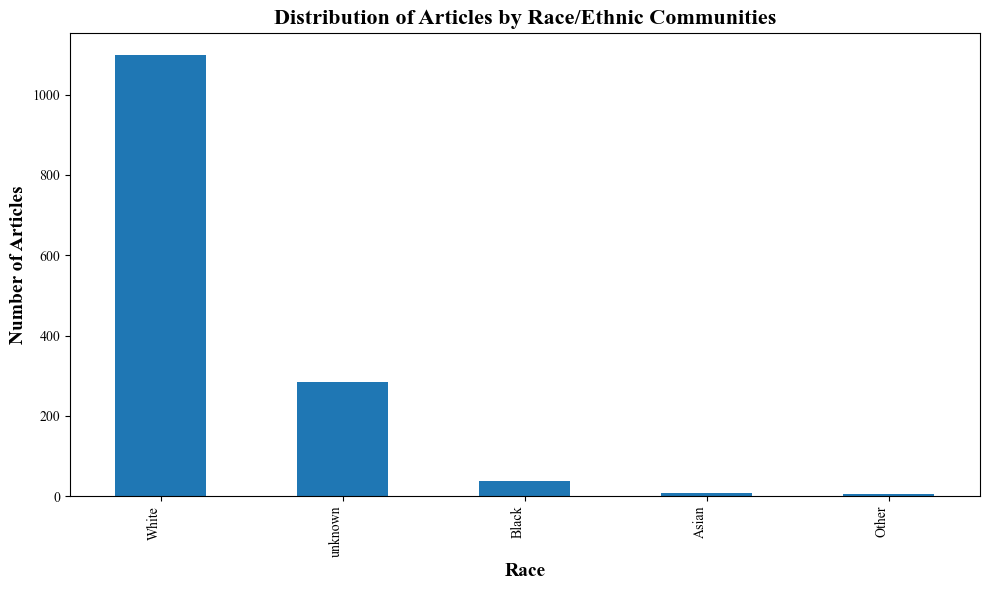

In [98]:
race_counts = df['race'].value_counts()

plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar')
plt.title('Distribution of Articles by Race/Ethnic Communities',fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.xlabel('Race',fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.ylabel('Number of Articles',fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.xticks(rotation=90, ha='right',fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.tight_layout()
plt.savefig('num_by_race', transparent = True)
plt.show()

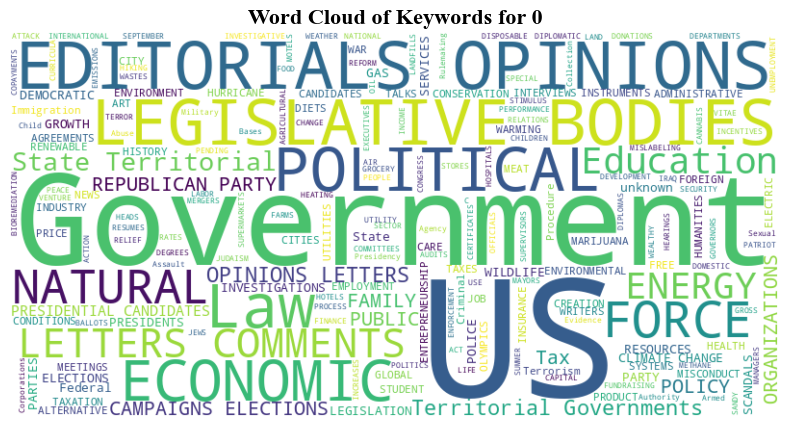

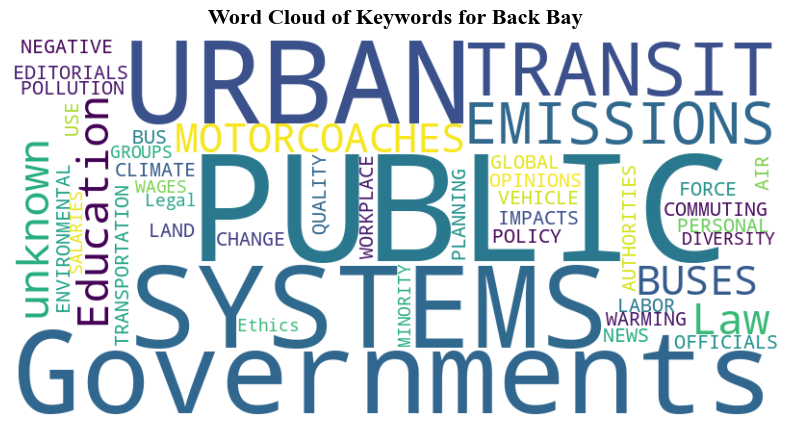

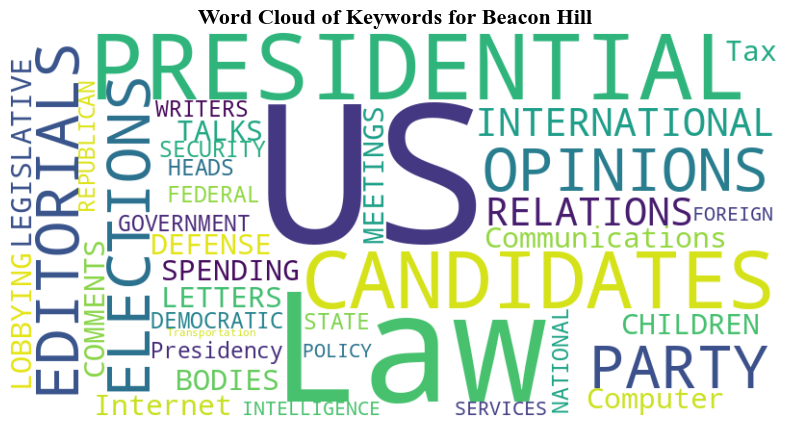

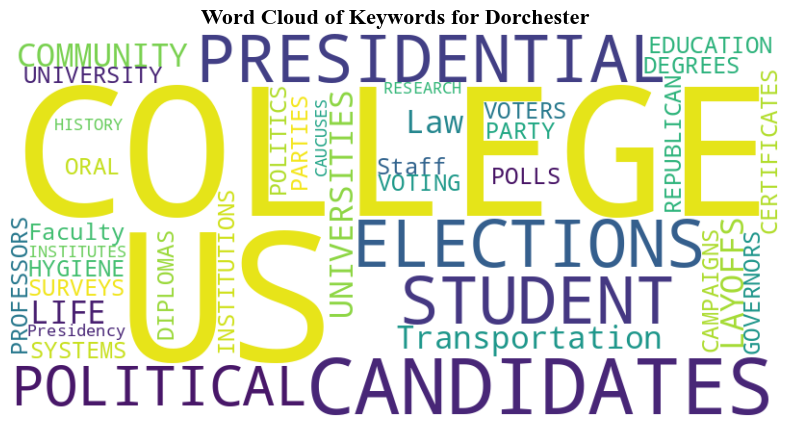

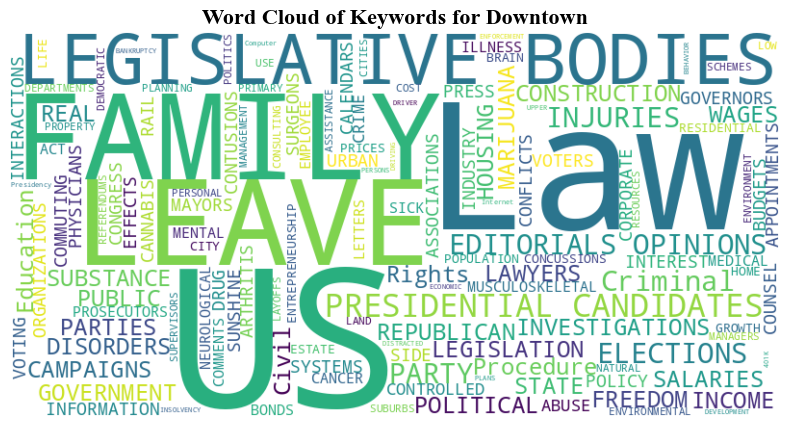

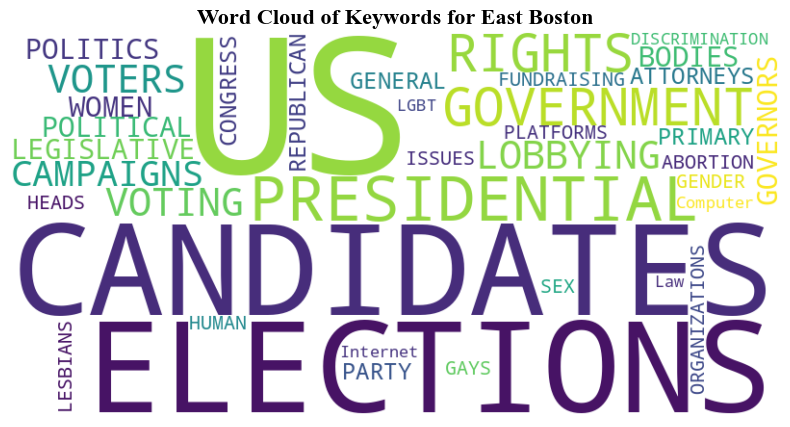

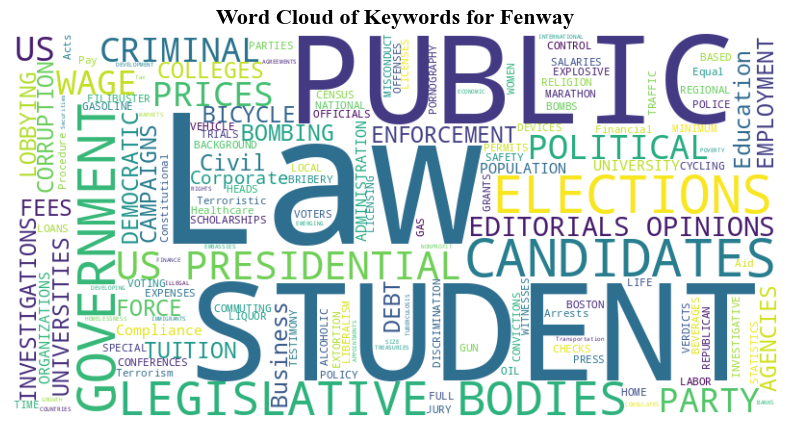

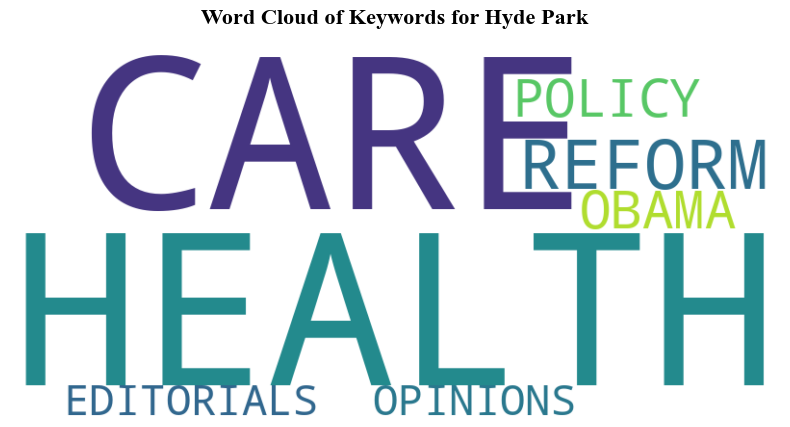

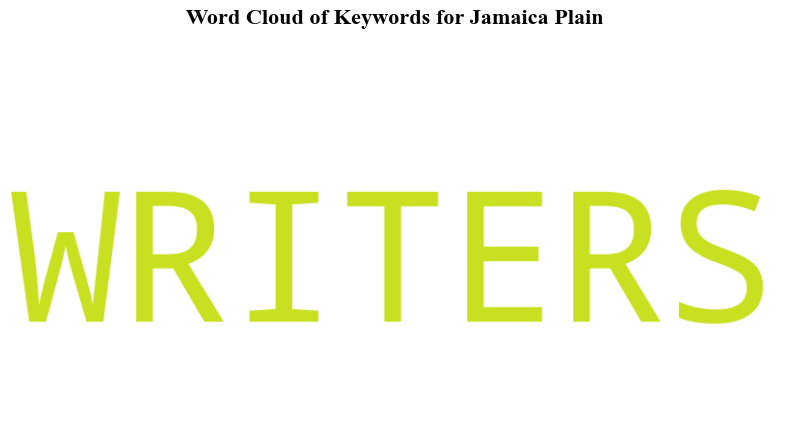

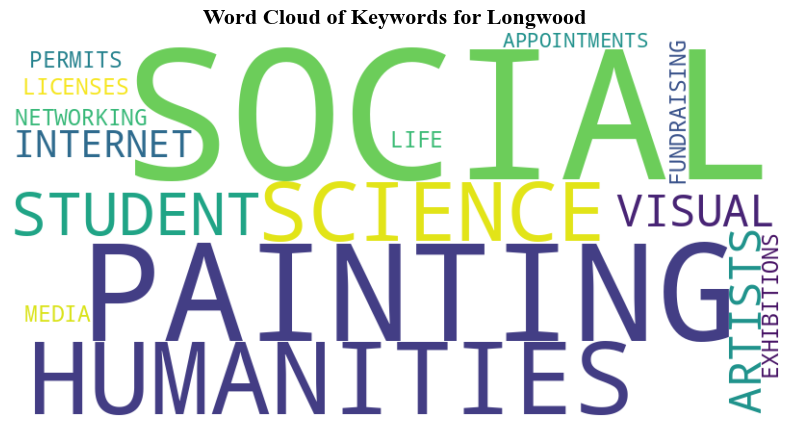

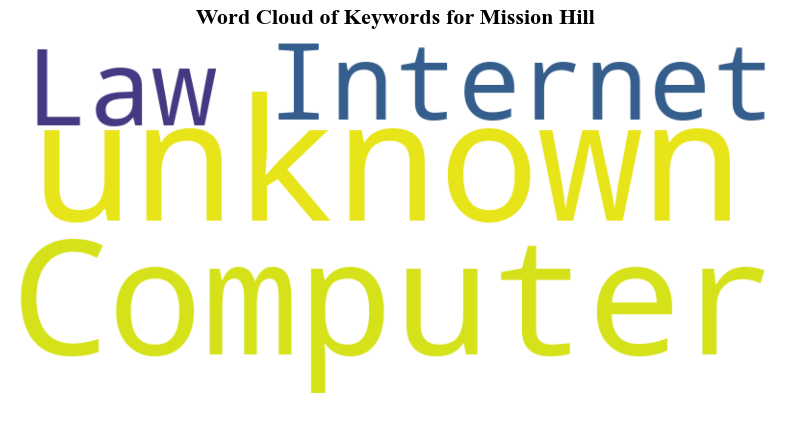

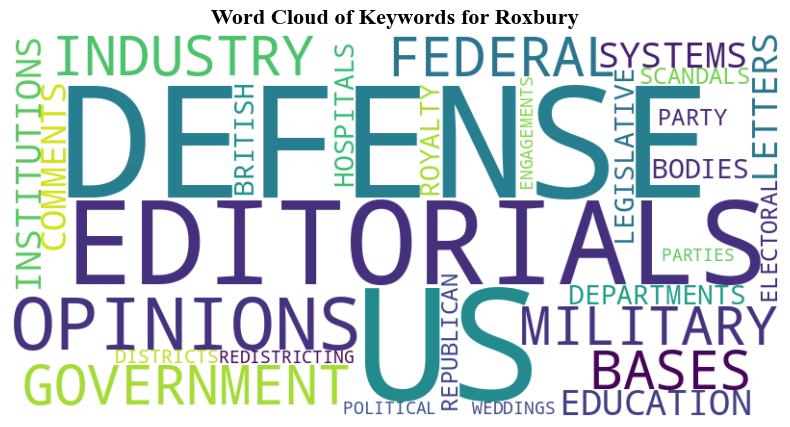

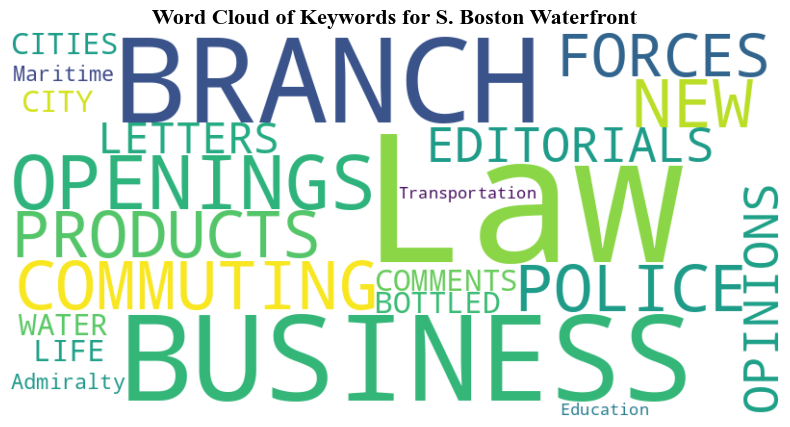

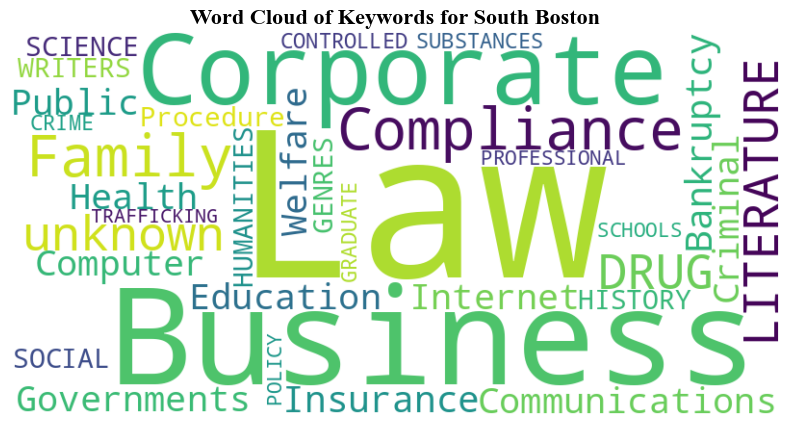

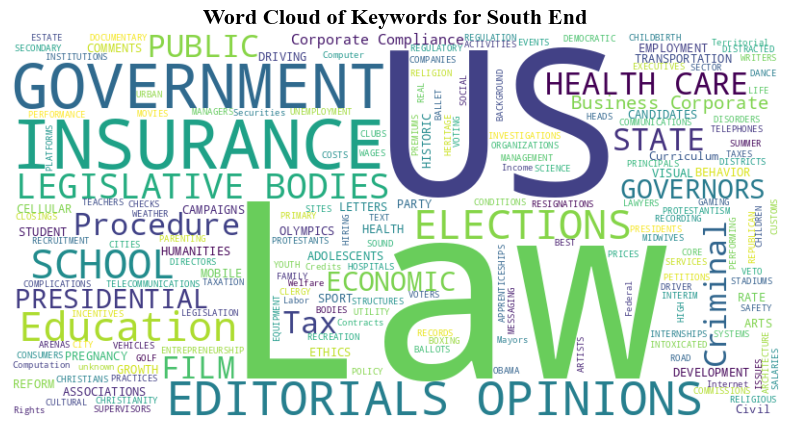

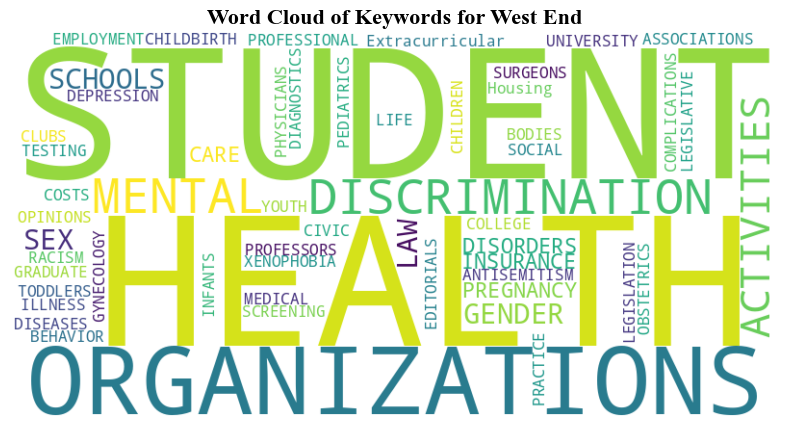

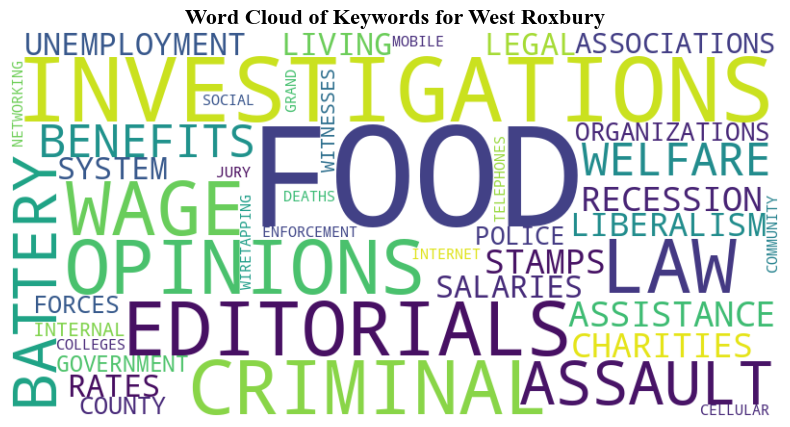

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame called df

# Filter articles with position_section as "EDITORIAL OPINION" and extract keywords
editorial_opinion_articles = df[df['position_section'] == 'EDITORIAL OPINION']
editorial_opinion_keywords = editorial_opinion_articles['keywords']

# Group articles by neighborhood
grouped_by_neighborhood = editorial_opinion_articles.groupby('neighborhood')['keywords'].apply(list)

# Generate word cloud for each neighborhood
for neighborhood, keywords_list in grouped_by_neighborhood.items():
    # Concatenate keywords into a single string
    all_keywords = ' '.join(keywords_list)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)
    
    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud of Keywords for {neighborhood}',fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
    plt.axis('off')
    plt.show()


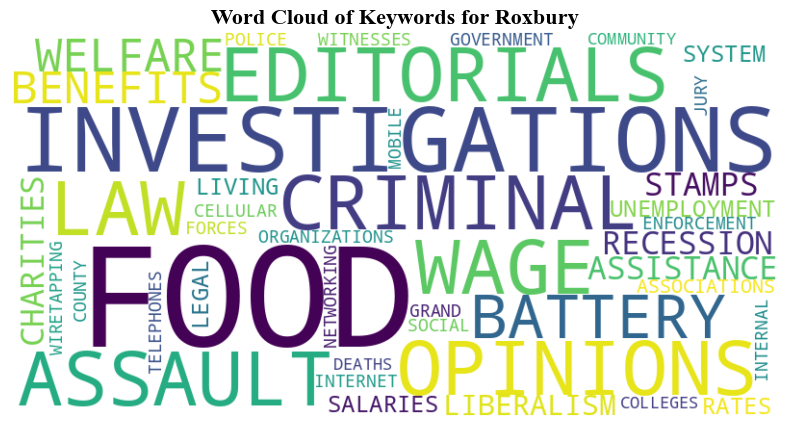

In [100]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter articles with position_section as "editorial opinion" and neighborhood as "West Roxbury"
west_roxbury_editorial_opinion = df[(df['position_section'] == 'EDITORIAL OPINION') & (df['neighborhood'] == 'West Roxbury')]

# Combine keywords into a single string
keywords_text = ' '.join(west_roxbury_editorial_opinion['keywords'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Keywords for Roxbury',fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.axis('off')
plt.show()


In [101]:
from collections import Counter

# Create a dictionary to store the majority race for each neighborhood
majority_race_by_neighborhood = {}

# Iterate over each neighborhood
for neighborhood in df['neighborhood'].unique():
    # Filter rows for the current neighborhood
    neighborhood_rows = df[df['neighborhood'] == neighborhood]
    
    # Count occurrences of each race in the neighborhood
    race_counts = Counter(neighborhood_rows['race'])
    
    # Find the race with the highest count
    majority_race = max(race_counts, key=race_counts.get)
    
    # Store the majority race for the neighborhood in the dictionary
    majority_race_by_neighborhood[neighborhood] = majority_race

# Print the majority race for each neighborhood
for neighborhood, race in majority_race_by_neighborhood.items():
    print(f"The majority race in '{neighborhood}' is '{race}'")


The majority race in 'Dorchester' is 'Black'
The majority race in '0' is 'unknown'
The majority race in 'South End' is 'White'
The majority race in 'Fenway' is 'White'
The majority race in 'Downtown' is 'White'
The majority race in 'Roxbury' is 'Black'
The majority race in 'West End' is 'White'
The majority race in 'Beacon Hill' is 'White'
The majority race in 'South Boston' is 'White'
The majority race in 'East Boston' is 'White'
The majority race in 'Jamaica Plain' is 'White'
The majority race in 'West Roxbury' is 'White'
The majority race in 'Chinatown' is 'Asian'
The majority race in 'S. Boston Waterfront' is 'White'
The majority race in 'Brighton' is 'White'
The majority race in 'Harbor Islands' is 'unknown'
The majority race in 'Back Bay' is 'White'
The majority race in 'Longwood' is 'White'
The majority race in 'Allston' is 'White'
The majority race in 'Roslindale' is 'White'
The majority race in 'Mattapan' is 'Black'
The majority race in 'Mission Hill' is 'White'
The majority r

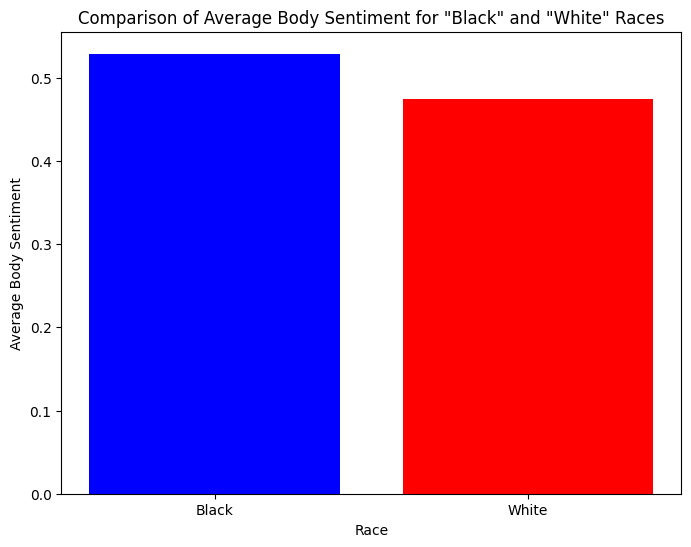

In [102]:
import matplotlib.pyplot as plt

# Filter rows where the race is "Black" or "White"
black_articles = df[df['race'] == 'Black']
white_articles = df[df['race'] == 'White']

# Calculate the mean body sentiment for each group
black_mean_sentiment = black_articles['body_sentiment'].mean()
white_mean_sentiment = white_articles['body_sentiment'].mean()

# Plot the comparison
plt.figure(figsize=(8, 6))
plt.bar(['Black', 'White'], [black_mean_sentiment, white_mean_sentiment], color=['blue', 'red'])
plt.xlabel('Race')
plt.ylabel('Average Body Sentiment')
plt.title('Comparison of Average Body Sentiment for "Black" and "White" Races')
plt.show()


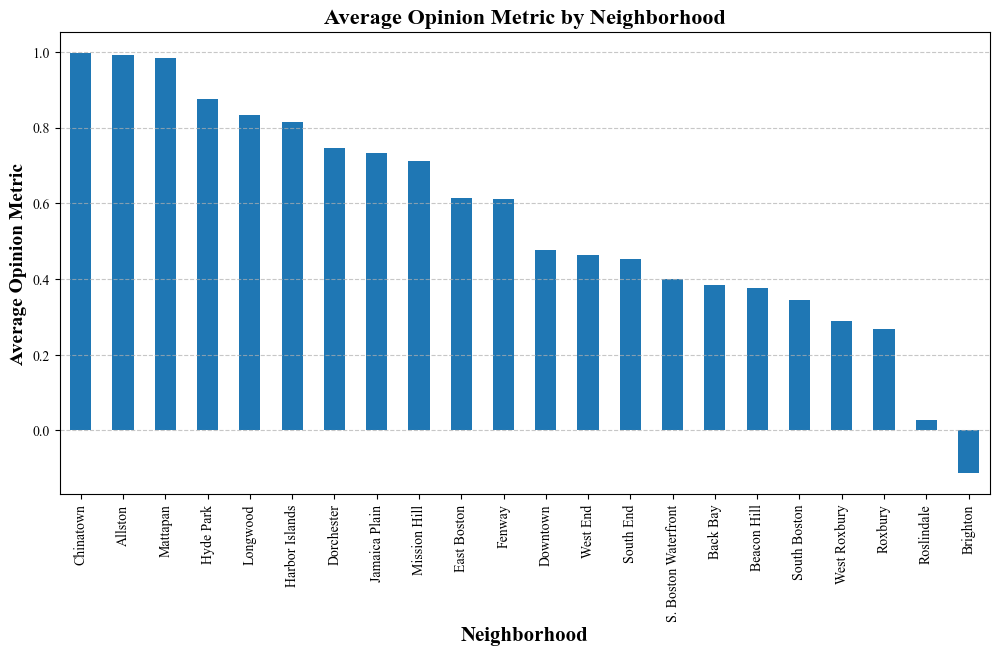

In [103]:
import matplotlib.pyplot as plt

# Calculate the mean body sentiment for each neighborhood
neighborhood_sentiments = df.groupby('neighborhood')['body_sentiment'].mean()
neighborhood_sentiments = neighborhood_sentiments.drop(['0'], errors='ignore')
neighborhood_sentiments = neighborhood_sentiments.sort_values(ascending=False)

# Plot the average body sentiment for each neighborhood
plt.figure(figsize=(12, 6))
neighborhood_sentiments.plot(kind='bar')
plt.xlabel('Neighborhood',fontdict={'fontsize': 15, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.ylabel('Average Opinion Metric',fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.title('Average Opinion Metric by Neighborhood',fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.xticks(rotation=90,fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1200x600 with 0 Axes>

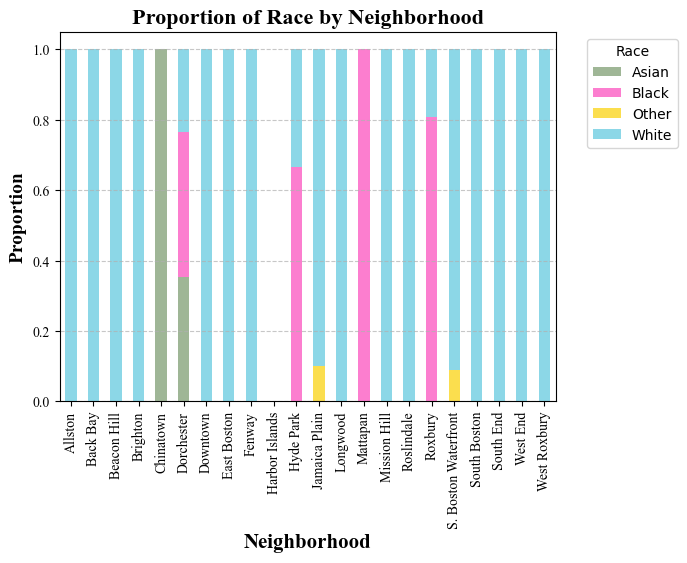

In [104]:
import matplotlib.pyplot as plt

# Group articles by neighborhood and race, and calculate the count of each race
neighborhood_race_counts = df.groupby(['neighborhood', 'race']).size().unstack(fill_value=0)
neighborhood_race_counts = neighborhood_race_counts.drop(['0'])


# Drop the "unknown" race if it exists
if 'unknown' in neighborhood_race_counts.columns:
    neighborhood_race_counts.drop(columns=['unknown'], inplace=True)

# Normalize the counts to proportions
neighborhood_race_proportions = neighborhood_race_counts.div(neighborhood_race_counts.sum(axis=1), axis=0)

# Define custom colors for each race
custom_colors = ['#9fb696', '#fc7ecf', '#fbde4e', '#8cd7e7']

# Plot the stacked bar graph with proportions and custom colors
plt.figure(figsize=(12, 6))
neighborhood_race_proportions.plot(kind='bar', stacked=True, color=custom_colors)

plt.xlabel('Neighborhood', fontsize=15, fontweight='bold', fontfamily='Times New Roman')
plt.ylabel('Proportion', fontsize=14, fontweight='bold', fontfamily='Times New Roman')
plt.title('Proportion of Race by Neighborhood', fontsize=16, fontweight='bold', fontfamily='Times New Roman')
plt.xticks(rotation=90, fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')

# Move the legend outside of the graph
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


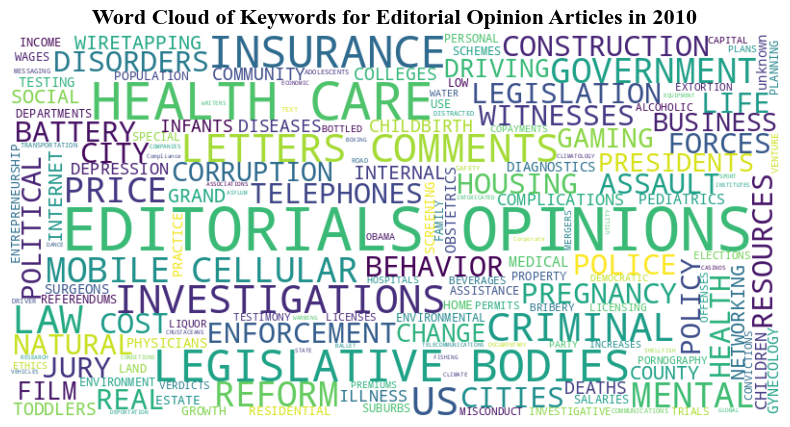

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame called df

# Filter articles with position_section as "EDITORIAL OPINION" within the year 2010 and extract keywords
editorial_opinion_articles = df[(df['position_section'] == 'EDITORIAL OPINION') & (df['year'] == 2010)]
editorial_opinion_keywords = editorial_opinion_articles['keywords']

# Concatenate keywords into a single string
all_keywords = ' '.join(editorial_opinion_keywords)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Keywords for Editorial Opinion Articles in 2010', fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.axis('off')
plt.show()


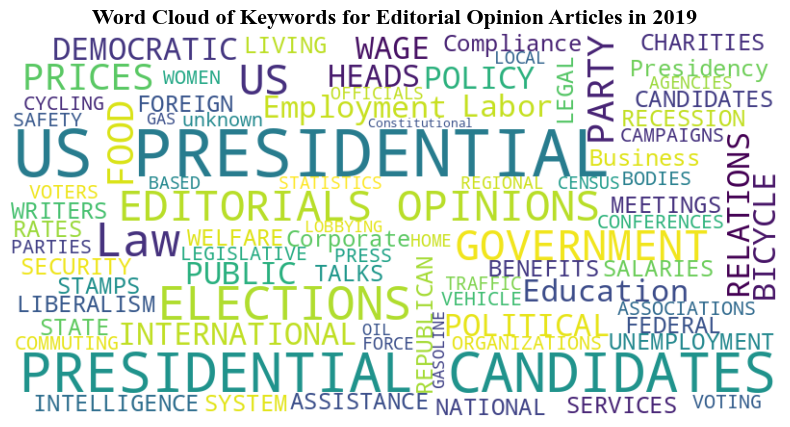

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame called df

# Filter articles with position_section as "EDITORIAL OPINION" within the year 2010 and extract keywords
editorial_opinion_articles = df[(df['position_section'] == 'EDITORIAL OPINION') & (df['year'] == 2019)]
editorial_opinion_keywords = editorial_opinion_articles['keywords']

# Concatenate keywords into a single string
all_keywords = ' '.join(editorial_opinion_keywords)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Keywords for Editorial Opinion Articles in 2019', fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.axis('off')
plt.show()
